<div style="background-color: rgb(223, 204, 251); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
        <img src="./img/h-m-re.png" style="width: 100px;" alt="">
        <p style="text-align: center; font-size: 40px; color:black; font-weight:bolder"> Exercise - 12</p>
</div>

<div style="background-color: rgb(223, 204, 251); border-radius: 25px; display: flex; justify-content: center; align-items: center; height:90px; ">
        
<p style="text-align: center; font-size: 80px; color:black; font-weight:bolder; height:40px; margin-top:20px;"> Online Retail</p>
</div>

<div style="background-color: rgb(223, 204, 251); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
        <img src="./img/store.gif" style="width: 50%;" style="border-radius:30px;" alt="">
        
</div>

<div style="background-color: rgb(223, 204, 251); border-radius: 25px; display: flex; justify-content: center; align-items: center; flex-direction: column;">
    <p style="text-align: left; font-size: 30px; color:black; font-weight:bolder; padding:0px 20px; line-height:50px;">
                This dataset contains information about sales invoices of the company's products. Each line displays the information of an invoice, such as invoice number, product code, product description, quantity, invoice date, unit price, customer ID, and customer country.
    </p>
</div>

<div style="background-color:rgb(223, 204, 251); border-radius: 25px; display: flex; justify-content: center; align-items: center; flex-direction: column;">
    <p style="text-align: left; font-size: 20px; color:black; font-weight:bolder; padding:0px 20px">
           "InvoiceNo": Unique number assigned to each invoice.<br>
        	<br>
           "StockCode": A unique code associated with each product in stock.<br>
        	<br>
           "Description": (product description): a brief description of the product, such as its name.<br>
        	<br>
           "Quantity": The number of products purchased per invoice.<br>
        	<br>
           "InvoiceDate": date and time of invoice issuance.<br>
        	<br>
           "UnitPrice": the unit price of each product.<br>
        	<br>
           "CustomerID": The unique identifier of the customer who issued or purchased the invoice.<br>
        	<br>
           "Country": The country of the customer who issued or purchased the invoice.<br>
        </p>
</div>

<div style="background-color: rgb(223, 204, 251); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
        <img src="./img/lib-re.png" style="width: 100px;" alt="">
        <p style="text-align: center; font-size: 40px; color:black; font-weight:bolder"> IMPORTING LIBRARY</p>
</div>

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
import datetime as dt
warnings.filterwarnings("ignore") 
from sklearn.impute import SimpleImputer #work with nul data
from sklearn.cluster import KMeans

<div style="background-color: rgb(223, 204, 251); border-radius: 25px; display: flex; justify-content: center; align-items: center; height:60px ">
        <p style="text-align: center; font-size: 40px; color:black; font-weight:bolder; margin-top:20px"> LOADING DATA</p>
</div>

<div style="background-color: rgb(223, 204, 251); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
        <img src="./img/loading.gif" style="width: 50%;" style="border-radius:30px;" alt="">
        
</div>

In [2]:
data = pd.read_csv('Online-Retail.csv')


<div style="background-color: rgb(223, 204, 251); border-radius: 25px; display: flex; justify-content: center; align-items: center;height:60px  ">
        <p style="text-align: center; font-size: 40px; color:black; font-weight:bolder; margin-top:20px"> DATA OVERVIEW</p>
</div>

In [3]:
data.shape

(541909, 8)

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
r_shop = data.copy()

In [9]:
r_shop['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [10]:
r_shop['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [11]:
r_shop['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [12]:
r_shop['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [13]:
r_shop['InvoiceDate'].unique()

array(['12/1/2010 8:26', '12/1/2010 8:28', '12/1/2010 8:34', ...,
       '12/9/2011 12:31', '12/9/2011 12:49', '12/9/2011 12:50'],
      dtype=object)

In [14]:
r_shop['UnitPrice'].unique()

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

In [15]:
r_shop['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [16]:
r_shop['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

<div style="background-color: rgb(208, 191, 255); border-radius: 25px; display: flex; justify-content: center; align-items: center;height:60px  ">
        <p style="text-align: center; font-size: 40px; color:black; font-weight:bolder; margin-top:20px"> DATA CLEANING</p>
</div>

In [17]:
data.isnull().sum().sort_values(ascending = False)[0:8]

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [18]:
data['Description'] = data['Description'].fillna('None').str.strip()
data = data[data['CustomerID'].notnull()]
#data['CustomerID'] = data['CustomerID'].fillna('0')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


<div style="background-color: rgb(208, 191, 255); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
<p style="text-align: center; font-size: 80px; color:black; font-weight:bolder; line-height:50px;">
ٍEDA</p>
</div>

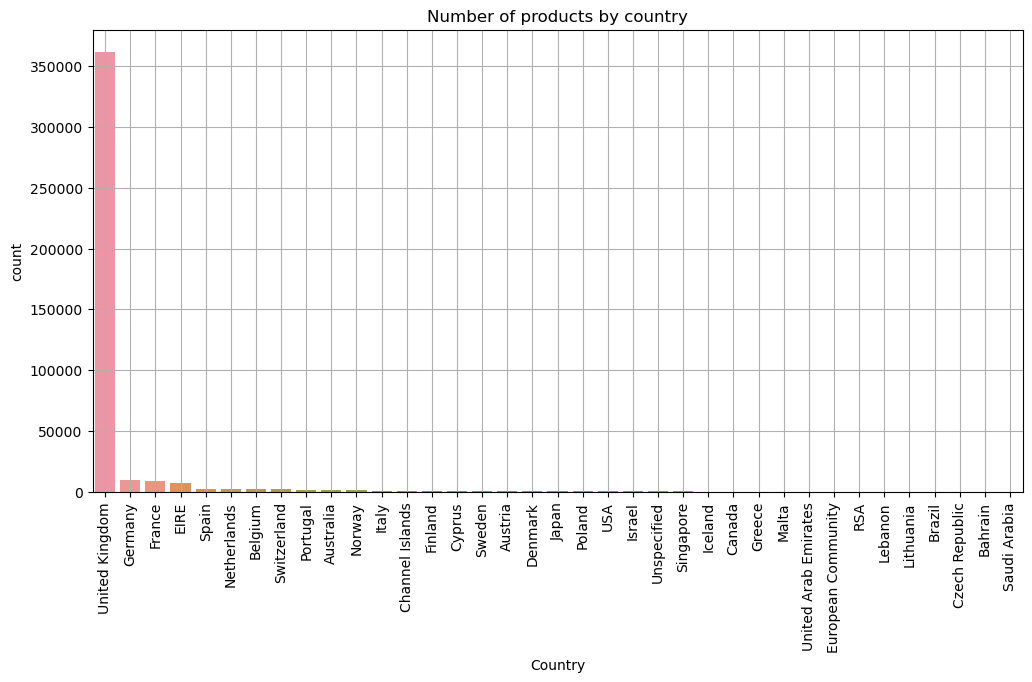

In [20]:
# Bar graph of the number of products by country
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=data, order=data['Country'].value_counts().index)
plt.title('Number of products by country')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


<div style="background-color: rgb(228, 133, 134); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
    <p style="text-align: center; font-size: 20px; color:black; font-weight:bolder; line-height:50px;">We can see that there are countries that have much more products than others. These countries are considered as more important markets for the products introduced in the dataset.<br>
Through this chart, we can understand the geographical distribution of products. In other words, which countries produce more products and which countries produce less?<br>
This chart can help management and marketing decisions. For example, if you want to introduce your product to new markets, you can make better decisions based on the number of products available in each country.<br>
Also, this chart can help to analyze the competition in different markets. If there are a large number of products from a single country in the dataset, this may indicate intense competition in that market.<br>
In general, this diagram can help to better understand the geographical distribution of products and the management of resources and markets in a company or business.<br>

</p>
</div>

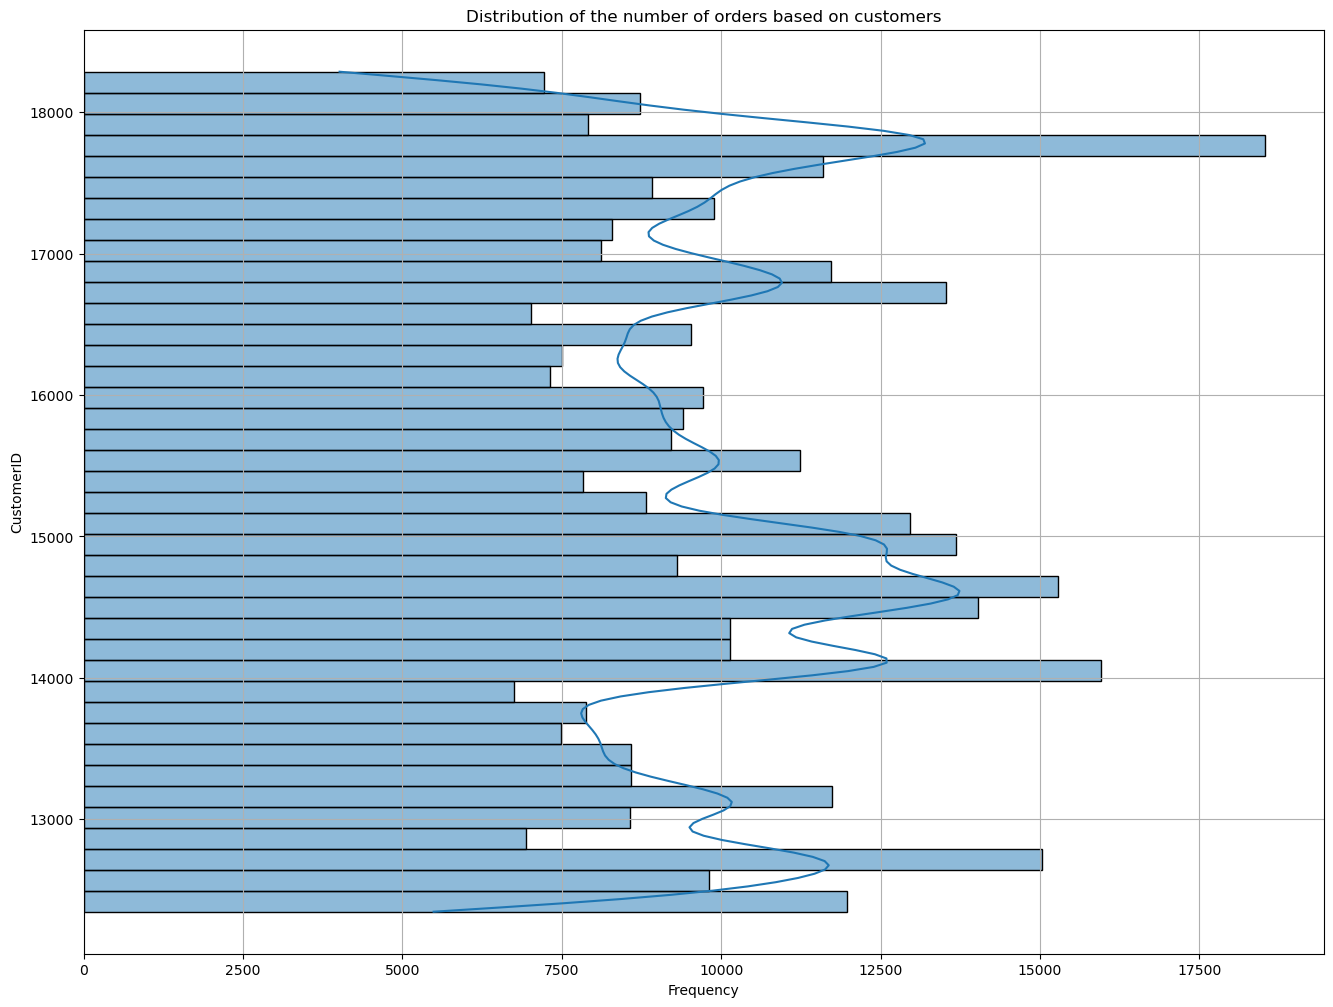

In [21]:
# Distribution chart of the number of orders based on customers
plt.figure(figsize=(16, 12))  # تغییر اندازه نمودار به عمودی
sns.histplot(data=data, y='CustomerID', bins=40, kde=True)  # تغییر x به y برای نمایش عمودی
plt.title('Distribution of the number of orders based on customers')
plt.xlabel('Frequency')  # تغییر برچسب محور x به Frequency
plt.ylabel('CustomerID')  # تغییر برچسب محور y به CustomerID
plt.grid(True)
plt.show()


<div style="background-color:rgb(145, 109, 179); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
    <p style="text-align: center; font-size: 20px; color:black; font-weight:bolder; line-height:50px;">Patterns of customer orders:By analyzing the chart, you can identify customer ordering patterns. In other words, do some customers order regularly or are their orders random? This may help you improve your marketing and customer management strategies.<br>
Number of customers with the same number of orders:Customers with the same number of orders may belong to a certain category. This information can be useful for determining customer groups and different customer needs.<br>
Identifying special customers:From this chart, you can identify customers who have had a large number of orders. These customers may be loyal and valuable customers for your business.<br>
Resource Management:Having information about the distribution of the number of orders, you can manage your resources more optimally. For example, if you know that some customers have placed a large number of orders, you can take measures to fulfill their orders in the best possible way.<br>
Overall, this chart helps us identify patterns and information about customer behavior in our data and make better decisions to improve our business performance.<br>

</p>
</div>

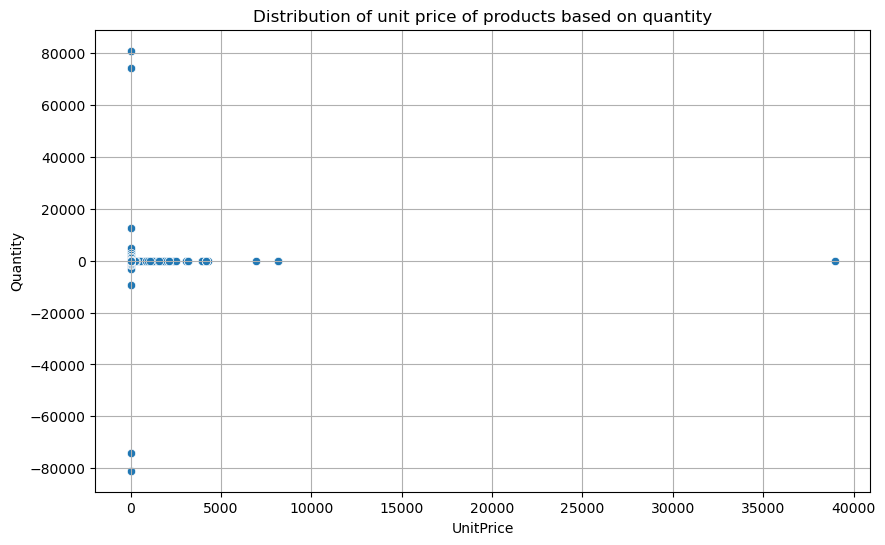

In [22]:
# Product unit price distribution chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=data)
plt.title('Distribution of unit price of products based on quantity')
plt.grid(True)
plt.show()

<div style="background-color:rgb(255, 187, 92); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
    <p style="text-align: center; font-size: 20px; color:black; font-weight:bolder; line-height:50px;">Product Unit Price Distribution: This chart shows us how available the products are per unit price. Are most of the products priced similarly or are there significant price differences?.<br>
Relationship between price and number of orders: By analyzing this chart, you can check if products with a higher price are ordered in fewer numbers and vice versa. This may help us understand whether changes in the unit price of products have an effect on the number of orders.<br>
Identification of special products: In this chart, you may identify products that have attracted customers with unique features such as high prices or high orders. These products can be exceptional items in your business.<br>
Use colors and sizes of points: If you use different sizes and colors for the points in the chart, you can display other features such as product categories or geographic regions and use it for further analysis.<br>
Overall, this chart provides us with information that is very useful in understanding the relationship between price and number of product orders and identifying patterns associated with different products.<br>

</p>
</div>

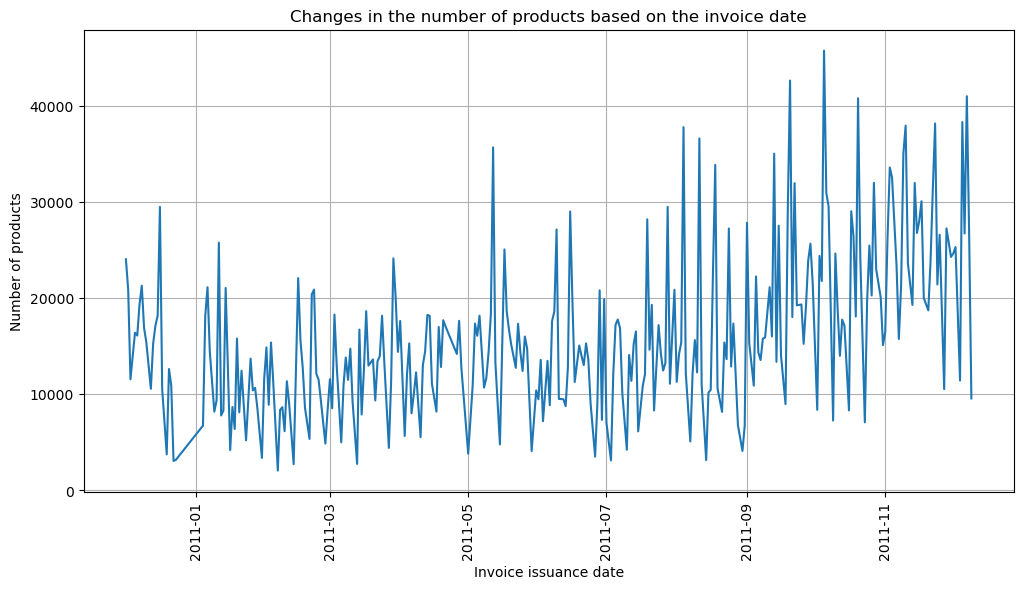

In [23]:


plt.figure(figsize=(12, 6))
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data_grouped = data.groupby(data['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
plt.plot(data_grouped['InvoiceDate'], data_grouped['Quantity'])
plt.title('Changes in the number of products based on the invoice date')
plt.xlabel('Invoice issuance date')
plt.ylabel('Number of products')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


<div style="background-color: rgb(226, 94, 62); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
    <p style="text-align: center; font-size: 20px; color:black; font-weight:bolder; line-height:50px;">Seasonal patterns: You can identify seasonal and monthly patterns by looking at changes in the number of products over time. For example, does the number of products increase or decrease in certain months?<br>
Demand peaks: From this chart, you can recognize the demand peaks for certain products. When the number of products increases dramatically, it may indicate increased demand or special events.<br>
Stability of supply: By checking the chart, you can see whether the supply of products is stable or not. If the chart shows unstable changes, there may be problems in the supply chain.<br>
Impact of events: If there are sudden and unexpected fluctuations in the chart, you can check whether these changes are due to certain events or not.<br>
Overall, this chart helps us analyze patterns, changes, and significant events in product count history and make decisions related to demand, inventory management, and planning.<br>

</p>
</div>

In [24]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = pd.to_datetime(data['InvoiceDate']).dt.strftime('%Y')
data['Month'] = pd.to_datetime(data['InvoiceDate']).dt.strftime('%m')
data['Day'] = pd.to_datetime(data['InvoiceDate']).dt.strftime('%d')
data['CustomerID'] = data['CustomerID'].astype(int)
data['Total_Sales'] = data['Quantity']*data['UnitPrice']

In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,01,20.34


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
 8   Year         406829 non-null  object        
 9   Month        406829 non-null  object        
 10  Day          406829 non-null  object        
 11  Total_Sales  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(7)
memory usage: 38.8+ MB


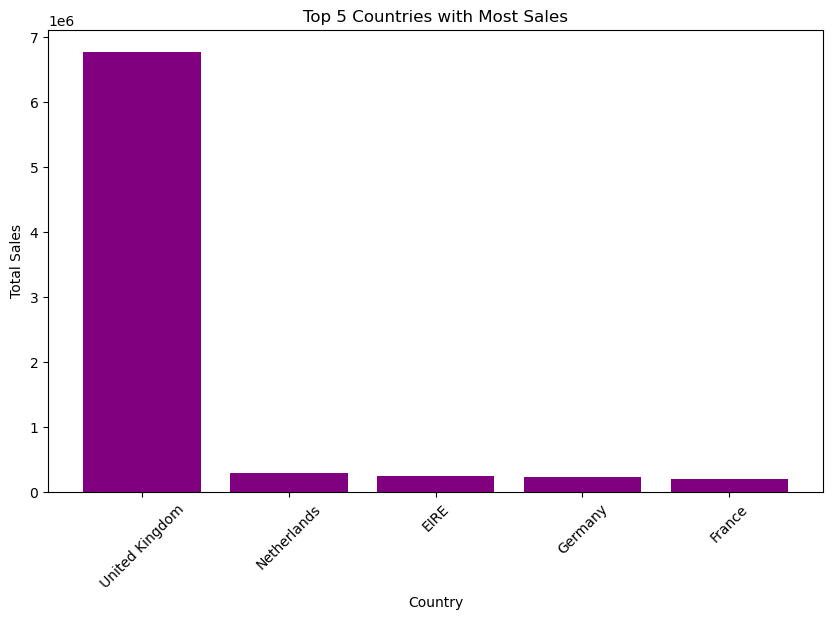

In [27]:
# Calculate total sales for each country
total_sales_per_country = data.groupby('Country')['Total_Sales'].sum()

# Select the five countries with the highest total sales
top_5_countries = total_sales_per_country.nlargest(5)

# Draw a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries.index, top_5_countries.values, color='purple')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 5 Countries with Most Sales')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: rgb(255, 155, 80); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
    <p style="text-align: center; font-size: 20px; color:black; font-weight:bolder; line-height:50px;">Identifying the main markets: With this market, you can identify the main markets that can be used for more sales and carry out your marketing and sales strategies in these markets.<br>
Identify sales trends: By observing changes in total sales over time, you can evaluate your business performance. If sales in a particular country have increased over time, it may be inferred from the effectiveness of its strategies in that country.<br>
Comparison of countries: By comparing the total sales in the top five countries, it is possible to examine the differences and similarities in the sales performance in this country. This comparison can help you make decisions related to resource attributes, marketing strategies, and business management.<br>
Factors affecting different factors: by observing the total sales in these countries, they can evaluate factors such as advertising, pricing, distribution and different products. This information can help you improve the optimization of your sales and marketing strategies based on operational information.<br>


</p>
</div>

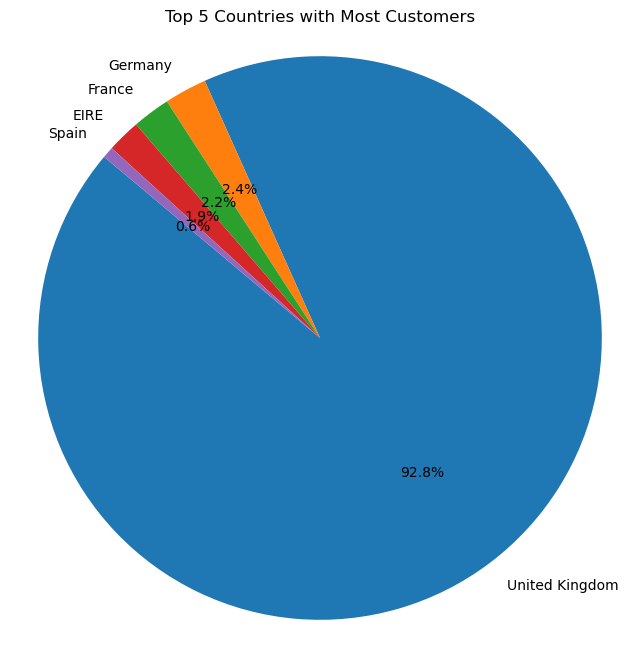

In [28]:
import matplotlib.pyplot as plt

# Calculate the number of customers for each country
total_customer_per_country = data.groupby('Country')['CustomerID'].count()

# Select the five countries with the largest number of customers
top_5_countries = total_customer_per_country.nlargest(5)

# Draw a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_countries, labels=top_5_countries.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 5 Countries with Most Customers')
plt.show()


<div style="background-color: rgb(198, 61, 47); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
    <p style="text-align: center; font-size: 20px; color:black; font-weight:bolder; line-height:50px;">Identifying the main markets: With this chart, we can identify our most well-known markets and consider them as the main targets for our marketing and sales strategies. This information can help you focus your time and resources in the best possible way on the most critical markets.<br>
Identification of potential markets: In addition to the main markets, this chart may also show potential markets. If a country with a relatively small number of customers, but shows a larger potential market, we can consider it as an opportunity to expand your business.<br>
Evaluating the effectiveness of marketing strategies: By observing changes in the number of customers in these countries over time, we can evaluate how effective our marketing and advertising strategies have been. If the number of customers in a country has increased, this may lead to the conclusion of a positive impact of our marketing strategies in that country.<br>
Comparing the number of customers with revenue: By combining this chart with a similar chart showing the number of customers with revenue by country (similar to the code provided earlier), we can see the differences and similarities between the number of customers and revenue in each country. This information can help us gain a better understanding of the relationship between the number of customers and revenue in each country.<br>


</p>
</div>

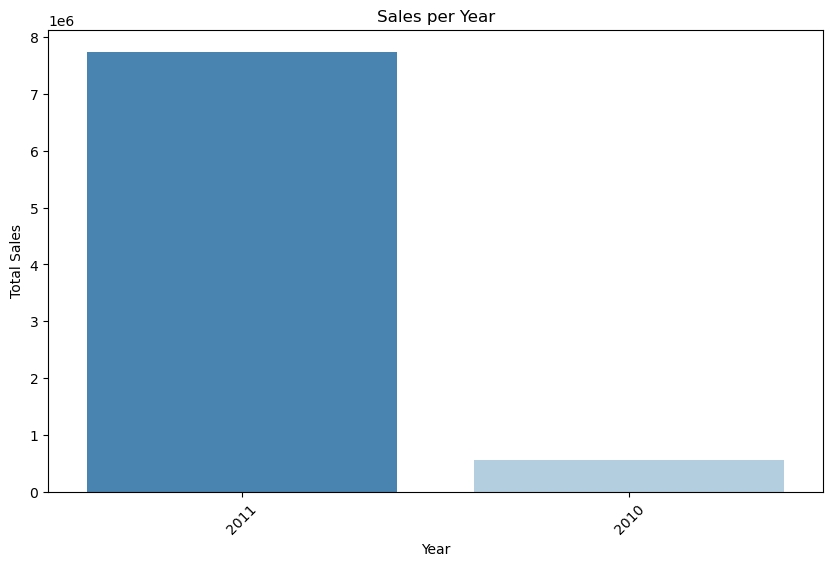

In [29]:
# Calculate total sales for each year
total_sales_per_year = data.groupby('Year')['Total_Sales'].sum().reset_index()

# Sort the data by total sales in descending order
total_sales_per_year = total_sales_per_year.sort_values('Total_Sales', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales_per_year, x='Year', y='Total_Sales', palette='Blues_r')
plt.title("Sales per Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


<div style="background-color:rgb(70, 75, 22); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
    <p style="text-align: center; font-size: 20px; color:black; font-weight:bolder; line-height:50px;">Year-to-year changes: These sales show how the overall business has changed each year. This will provide you with information on whether the business has been growing or declining over recent years.<br>
Identifying the best-selling years: From this image, you can understand which years have bought the most. This may help you identify the reasons for success in those years and implement similar strategies in future years.<br>
Comparison of years: This code can be compared in different years. This can help you choose the best times to run promotions, discounts, and bidding strategies.<br>



</p>
</div>

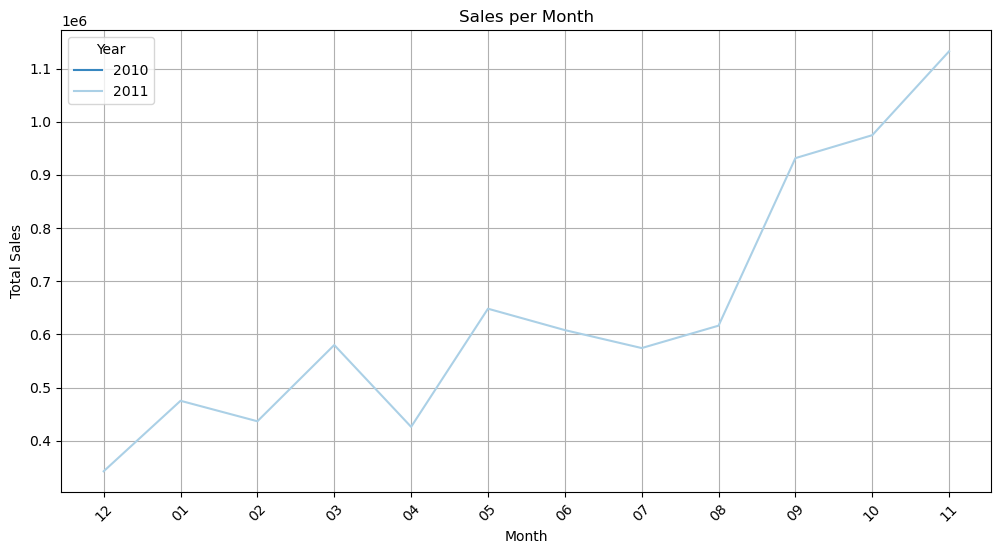

In [30]:


# Group the data by Month and Year and calculate the total sales
total_sales_per_month = data.groupby(['Year', 'Month'])['Total_Sales'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_sales_per_month, x='Month', y='Total_Sales', hue='Year', palette='Blues_r')
plt.title("Sales per Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<div style="background-color:rgb(137, 129, 33); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
    <p style="text-align: center; font-size: 20px; color:black; font-weight:bolder; line-height:50px;">Monthly changes in sales: This chart shows how sales change during each month of the year. This information helps us identify monthly patterns in sales. For example, we may have higher sales in certain months (such as December due to the holidays).<br>
Year-to-year comparison: By having two lines for two different years, it is possible to compare whether sales this year have increased as much as last year. This comparison can help us evaluate the effect of changes we have implemented (such as advertising strategy or discounts).<br>
Identify patterns and trends: Look for patterns and trends through analysis. For example, we may see that we have an increase in sales every month or a certain drop occurs. This information can help us develop better strategies to improve sales in certain months.<br>
Turning points and changes: If we see turning points or improvements (for example, strong sales in a certain month or decline), these points can indicate certain events or factors. have created To analyze the causes of these changes, other factors and factors should be examined.<br>
Overall, this allows us to analyze changes in sales over time and different patterns over months and years to improve our business strategies and decisions.<br>
</p>
</div>

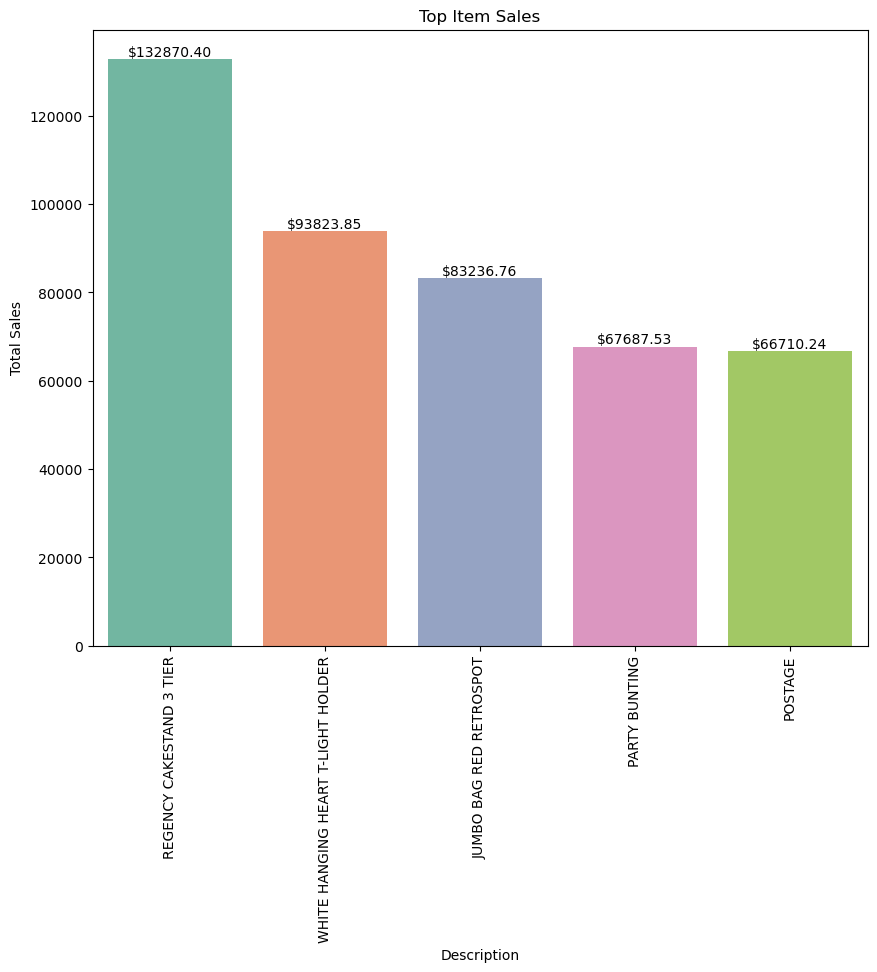

In [31]:
total_sales_per_category = data.groupby('Description')['Total_Sales'].sum().reset_index().sort_values('Total_Sales', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(data=total_sales_per_category.head(5), y='Total_Sales', x='Description', palette='Set2')
plt.title("Top Item Sales")
plt.xlabel("Description")
plt.ylabel("Total Sales")
for p in plt.gca().patches:
    plt.gca().annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()





<div style="background-color:rgb(231, 177, 10); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
    <p style="text-align: center; font-size: 20px; color:black; font-weight:bolder; line-height:50px;">Best-selling products: The products that are in this chart above are the products that sell the most. Knowing the best-selling products can help the business to promote the best products and increase its revenue.<br>
Check the quality of the products: If the products are of low quality in this list, there may be problems with the quality or satisfaction provided. In this case, we must carefully examine the quality of the products.<br>
Branding and advertising: Products listed above may be well branded or advertised. This information can help make decisions about branding and advertising.<br>
Variety of products: If different products are on the top list, it is possible that they refer to a variety of products. Knowing the types of products can help the business to develop new balanced products and respond to the needs of customers.<br>
Overall, this helps us to identify important products and their performance in the market and make better strategies to improve our business and work.<br>
</p>
</div>

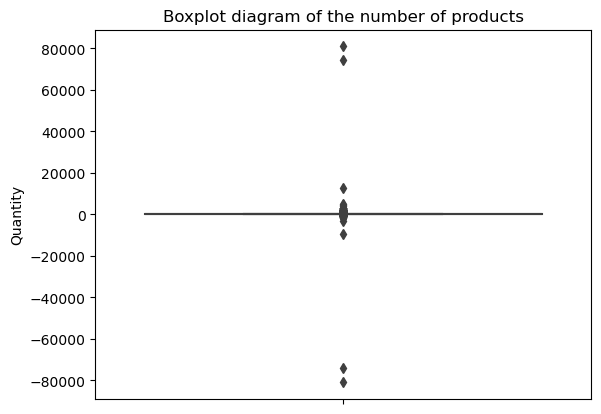

In [32]:
# Boxplot diagram of the number of productsplt.figure(figsize=(8, 6))
sns.boxplot(y='Quantity', data=data)
plt.title('Boxplot diagram of the number of products')
plt.show()

<div style="background-color: rgb(223, 204, 251); border-radius: 25px; display: flex; justify-content: center; align-items: center; height:60px ">
        <p style="text-align: center; font-size: 40px; color:black; font-weight:bolder; margin-top:20px"> Data Clustering </p>
</div>

<div style="background-color: rgb(223, 204, 251); border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
        <img src="./img/k_means.gif" style="width: 50%;" style="border-radius:30px;" alt="">
        
</div>

In [33]:
#data['RFM_day'] = data['Year'] + data['Month'] + data['Day']
data['RFM_day'] =data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))

In [34]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Total_Sales,RFM_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,01,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,01,20.34,2010-12-01


In [35]:
dt.timedelta(1)

datetime.timedelta(days=1)

In [36]:
each_date = max(data['RFM_day']) + dt.timedelta(1)
each_date

Timestamp('2011-12-10 00:00:00')

In [37]:
grouped_data = data.groupby('CustomerID').agg({
    'RFM_day': lambda x: (each_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Sales': 'sum',
    'StockCode': 'nunique' ,
    'CustomerID': 'first'  
})



In [38]:
grouped_data.rename(columns= {
    'RFM_day': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total_Sales': 'Monetary',
    'StockCode' : 'StockCode'
}, inplace=True)

In [39]:

print(grouped_data)

            Recency  Frequency  Monetary  StockCode  CustomerID
CustomerID                                                     
12346           326          2      0.00          1       12346
12347             3        182   4310.00        103       12347
12348            76         31   1797.24         22       12348
12349            19         73   1757.55         73       12349
12350           311         17    334.40         17       12350
...             ...        ...       ...        ...         ...
18280           278         10    180.60         10       18280
18281           181          7     80.82          7       18281
18282             8         13    176.60         12       18282
18283             4        756   2094.88        263       18283
18287            43         70   1837.28         59       18287

[4372 rows x 5 columns]


In [40]:
grouped_data.isnull().sum()

Recency       0
Frequency     0
Monetary      0
StockCode     0
CustomerID    0
dtype: int64

In [41]:
#grouped_data.to_csv('rfm_customers.csv', index=False)

In [42]:
#sclae  کردن بر اساس  qcut 

In [43]:
# Scaling the Recency column using qcut
R_labels = range(4, 0, -1) #[4, 3, 2]
grouped_data['R_Scaled'] = pd.qcut(grouped_data['Recency'], q=4, labels=R_labels)

# Scaling the Recency column using qcut
F_labels = range(1, 5) # [1, 2, 3, 4, 5]
grouped_data['F_Scaled'] = pd.qcut(grouped_data['Frequency'], q=4, labels=F_labels)

# مقیاس‌بندی ستون Monetary با استفاده از qcut
M_labels = range(1, 5)
grouped_data['M_Scaled'] = pd.qcut(grouped_data['Monetary'], q=4, labels=M_labels)

In [44]:
grouped_data

,Recency,Frequency,Monetary,StockCode,CustomerID,R_Scaled,F_Scaled,M_Scaled
CustomerID,,,,,,,,
12346,326,2,0.00,1,12346,1,1,1
12347,3,182,4310.00,103,12347,4,4,4
12348,76,31,1797.24,22,12348,2,2,4
12349,19,73,1757.55,73,12349,3,3,4
12350,311,17,334.40,17,12350,1,1,2
...,...,...,...,...,...,...,...,...
18280,278,10,180.60,10,18280,1,1,1
18281,181,7,80.82,7,18281,1,1,1
18282,8,13,176.60,12,18282,4,1,1


In [45]:
#grouped_data.to_csv('rfm_customers2.csv', index=False)

In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

grouped_data['R_Scaled'] = (grouped_data['Recency'] - grouped_data['Recency'].mean()) / grouped_data['Recency'].std()
grouped_data['F_Scaled'] = (grouped_data['Frequency'] - grouped_data['Frequency'].mean()) / grouped_data['Frequency'].std()
grouped_data['M_Scaled'] = (grouped_data['Monetary'] - grouped_data['Monetary'].mean()) / grouped_data['Monetary'].std()

# Select the desired features (Recency, Frequency, Monetary)
X = grouped_data[['R_Scaled', 'F_Scaled', 'M_Scaled']].values



In [47]:
# Number of clusters (10 clusters are selected here)
n_clusters = 10

# Implementation of the KMeans algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
grouped_data['Cluster'] = kmeans.fit_predict(X)  

# Find the product that has the highest number of purchases in each cluster
cluster_max_purchase = grouped_data.groupby('Cluster')['Frequency'].idxmax()
most_purchased_products = grouped_data.loc[cluster_max_purchase]


In [48]:
# Generate proposals for customers
recommendations = {}
for cluster, product_row in most_purchased_products.iterrows():
    cluster_id = product_row['Cluster']
    product_code = product_row['StockCode']  
    cluster_members = grouped_data[grouped_data['Cluster'] == cluster_id]
    non_buyers = cluster_members[cluster_members['StockCode'] != product_code]
    recommendations[cluster_id] = {
        'StockCode': product_code,
        'NonBuyers': non_buyers['CustomerID'].tolist()    
    }


In [49]:
# show results
for cluster_id, recommendation in recommendations.items():
    print(f'Cluster {cluster_id}:')
    print(f'Most Purchased Product: {recommendation["StockCode"]}')
    print(f'Non-Buyers of Most Purchased Product: {recommendation["NonBuyers"]}')
    print('\n')


Cluster 0.0:
Most Purchased Product: 24.0
Non-Buyers of Most Purchased Product: [12346, 12350, 12361, 12365, 12373, 12377, 12386, 12401, 12402, 12410, 12441, 12489, 12501, 12503, 12505, 12509, 12514, 12515, 12551, 12559, 12561, 12564, 12565, 12574, 12591, 12605, 12614, 12623, 12651, 12652, 12665, 12666, 12672, 12686, 12707, 12734, 12735, 12736, 12738, 12755, 12764, 12791, 12792, 12793, 12797, 12811, 12817, 12829, 12831, 12834, 12845, 12852, 12855, 12866, 12870, 12872, 12873, 12881, 12902, 12943, 12945, 12956, 12988, 13002, 13008, 13011, 13033, 13043, 13044, 13059, 13060, 13065, 13072, 13093, 13108, 13121, 13132, 13133, 13144, 13161, 13166, 13185, 13187, 13216, 13226, 13239, 13261, 13262, 13270, 13284, 13295, 13299, 13304, 13328, 13341, 13345, 13357, 13358, 13368, 13369, 13370, 13382, 13385, 13439, 13452, 13493, 13494, 13497, 13506, 13512, 13551, 13581, 13600, 13615, 13626, 13649, 13672, 13684, 13693, 13703, 13706, 13707, 13708, 13712, 13715, 13716, 13718, 13747, 13751, 13753, 13781, 13

In [50]:
#peyman Radmanesh